# Activity 3
## Convert and Transform Raw Data
### Data taken from Pew Research Center's 'Gaming, Jobs and Broadband' Survey

#### Topics of interest chosen for this activity are:
1. Age
2. Education
3. Income
4. Smartphone Ownership
5. Parenthood
6. Employment
7. Race 
8. Political Affiliation

References: 
https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/barplot.html

http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/

http://docs.ggplot2.org/0.9.2.1/labs.html

https://www.r-bloggers.com/basic-introduction-to-ggplot2/

http://www.statmethods.net/graphs/bar.html

In [1]:
#Load required libraries
library(ggplot2)
library(dplyr)
library(RSQLite) 
library(plyr)
library(sqldf)
library(gdata)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Warning message:
"package 'sqldf' was built under R version 3.3.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.3.3"Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
gdata: Unable to locate valid perl interpr

In [2]:
#Read data from the CSV file
data = read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header = TRUE)

### Q.1 Correlation of Smartphone Ownership and Age

Hypothesis: Smartphones are arguably ubiquitious these days. However, we usually find the younger generation using smartphones more than older people. We have the data about smartphone usage, and the ages of the users. We calculate the percentage of respondents using smartphones for various age groups and visualize it using bar charts.

We first extract data where we have the information about whether respondents use smartphones or not, along with their age, and delete rows where there is invalid (NA) data.

In [3]:
#Get rows where user have answered either yes or no to owning smartphones
q1 <- data %>% select(age,smart1) %>% filter((smart1==1 | smart1==2))

# Delete values where there might be invalid data
q1 <- na.omit(q1)


Now, we divide the absolute ages into ranges of age, from 18-29,30-49,50-64, and 65 (and above), and then sort the data according to age ranges

In [4]:


test <- q1
test$age <- cut(q1$age, 
                       breaks = c(18, 30, 50, 65, Inf), 
                       labels = c("18-29", "30-49", "50-64", "65+"), 
                       right = FALSE)

In [5]:
test <- arrange(test,age)
head(test)

age,smart1
18-29,1
18-29,1
18-29,1
18-29,1
18-29,1
18-29,1


We now group the data according to age and smartphone usage and get a count of how many users have/don't have smartphones, within their respective age groups

In [6]:
test <- test %>% select(age,smart1) %>% group_by(age,smart1)
test <- count(test,c('age','smart1'))

We get a total count of users who have/don't have smartphones, per age group, and combine it with the data above, so we have the total users per age group, and the number of users who use/don't use smartphones, within that age group

In [7]:
c1<-count(test,'age')
c2 <- right_join (test,c1, by="age")


Using freq as weighting variable


Now, we shall filter on the above data and keep only those rows where the respondents own smartphones, and then rename the columns accordingly.

In [8]:
c2<-filter(c2,smart1==1)
c2 <- rename.vars(c2, c("age","smart1","freq.x","freq.y"), 
                      c("age","smart1","OwnSmartphone","Total"))


Changing in c2                                     
From: age smart1 freq.x        freq.y
To:   age smart1 OwnSmartphone Total 



Now, using the above data, we add another column for the percentage of users who own smartphones, within an age group

In [9]:
c3<- select(c2,age,OwnSmartphone,Total)
c3 <- mutate(c3, percent = OwnSmartphone*100/Total)

We plot the data using a bar plot

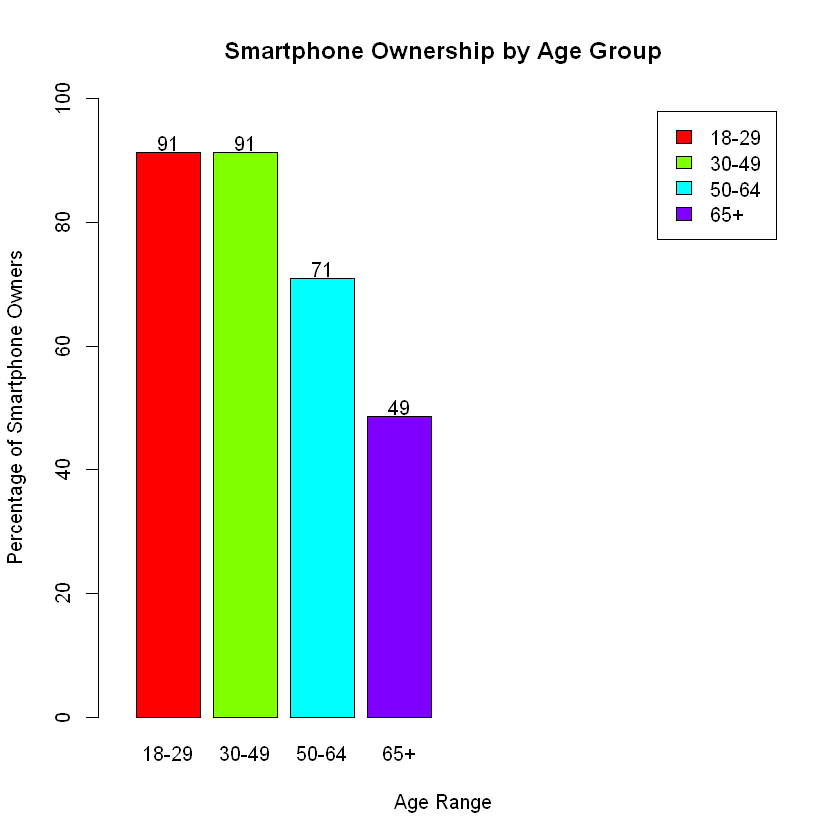

In [10]:
bplt <- barplot(c3$percent, names = c3$age,col=rainbow(4),xlim=c(0,100),width=10,
  xlab = "Age Range", ylab = "Percentage of Smartphone Owners", ylim=c(0,100),
  main = "Smartphone Ownership by Age Group",legend = c3$age)
text(bplt, c3$percent, labels=round(c3$percent), pos=3, offset=.1)


From the above data, we can see that smartphone ownershp is very high among the age groups 18-29 and 30-49, with 91% of the respondents owning smartphones. This decreases significantly going further, whereas the group 50-64 has 71% respondents owning smartphones, respondents aged 65 and above have only 49% of the respondents owning smartphones.

Hence, we have enough evidence to support our hypothesis that smartphone ownership is more prevalent in younger age-groups than in older ones.

<br>
<br>
<br>

### Q.2 Smartphone ownership and Education

Hypothesis:
We are interested in finding whether there is relation between the education of respondents and whether they own a smartphone or not. In short, do people who are more educated prefer owning smartphones than those who are relatively less educated? 
My intuition says people who are more educated would have a preference for owning/using smartphones.

First, we collect data related to education and smartphone ownership of the respondents, and remove invalid(NA) values

In [11]:
#Get rows where user have answered yes/no to owning smartphones
q2 <- data %>% select(educ2,smart1) %>% filter((smart1==1|smart1==2))
q2 <- na.omit(q2)


We remove the rows where education data is either 'Unknown' OR the respondent refused to answer, and then proceed to categorize the data with the correct labels ( 1 & 2 = Less then high school, 8 = Post graduation etc )

In [12]:
q2 <- filter(q2,(educ2!=98) & (educ2!=99))

In [13]:
test1 <- q2


In [14]:
test1$educ2[test1$educ2 == "1"|test1$educ2 == "2"] <- "LT High School"
# test1$educ2[test1$educ2 == "1"|test1$educ2 == "2"] <- "LT High School"
test1$educ2[test1$educ2 == "3"] <- "High School Grad"
test1$educ2[test1$educ2 == "4"|test1$educ2 == "5"] <- "Some Colg/2 Year Degree"
test1$educ2[test1$educ2 == "6"|test1$educ2 == "7"] <- "4 Yr Colg/University +"
test1$educ2[test1$educ2 == "8"] <- "Postgrad degree"


In [17]:
test1 <- arrange(test1,educ2)

We group the data together and get a count for the number of respondents for each category

In [18]:
# data.frame(table(test$smart1))
test1 <- count(test1,c('educ2','smart1'))
head(test1)

educ2,smart1,freq
4 Yr Colg/University +,1,352
4 Yr Colg/University +,2,72
High School Grad,1,252
High School Grad,2,149
LT High School,1,62
LT High School,2,45


In [19]:
q2c <- count(test1,'educ2')


Using freq as weighting variable


We now join the original data with the total count for each individual category, whether or not they own a smartphone

In [20]:
q2c1 <- right_join (test1,q2c, by="educ2")


Only keep those rows where users own smartphones, and rename the columns accordingly.

In [21]:
q2c2<-filter(q2c1,smart1==1)

In [22]:
q2c2 <- rename.vars(q2c2, c("educ2","smart1","freq.x","freq.y"), 
                                  c("Education","smart1","OwnSmartPhone","Total"))


Changing in q2c2                                           
From: educ2     smart1 freq.x        freq.y
To:   Education smart1 OwnSmartPhone Total 



Add a new column for percentage of users in each category, and plot the data

In [23]:
q2c3<- select(q2c2,Education,OwnSmartPhone,Total)
q2c3 <- mutate(q2c3, percent = OwnSmartPhone*100/Total)

In [24]:
q2c3

Education,OwnSmartPhone,Total,percent
4 Yr Colg/University +,352,424,83.01887
High School Grad,252,401,62.84289
LT High School,62,107,57.94393
Postgrad degree,293,359,81.61560
Some Colg/2 Year Degree,355,477,74.42348


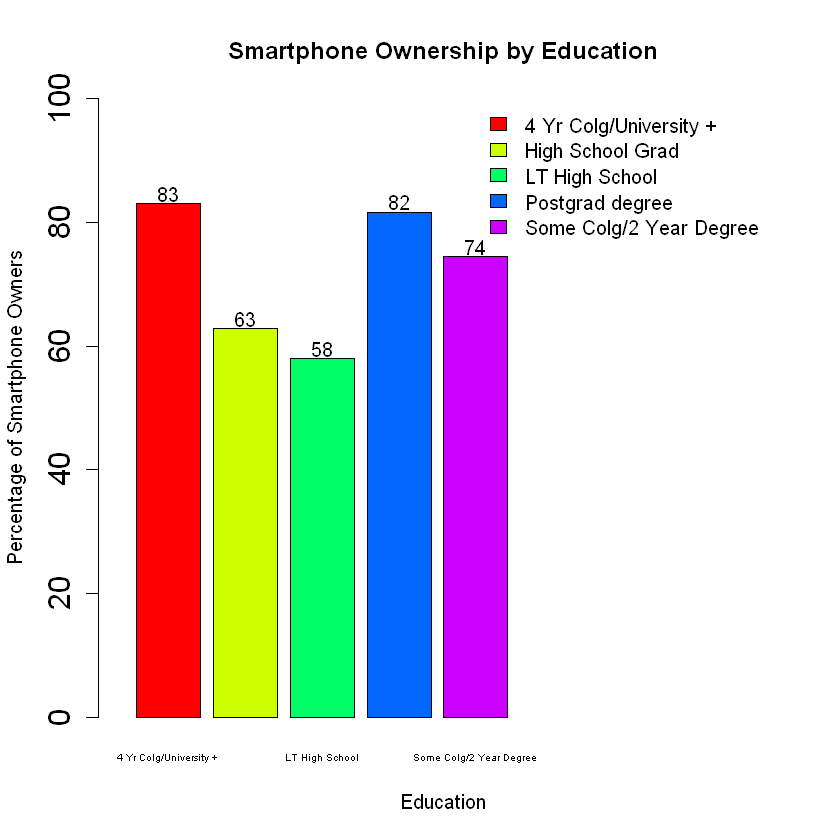

In [25]:
bplt2 <- barplot(q2c3$percent, names = q2c3$Education,col=rainbow(5),
  xlab = "Education",
                 ylab = "Percentage of Smartphone Owners", ylim=c(0,100),xlim=c(0,10),
  main = "Smartphone Ownership by Education",
                 legend = q2c3$Education,width=1,
                args.legend = list(x ='topright', bty='n'), cex.axis=1.5,cex.names=0.5)
text(bplt2, q2c3$percent, labels=round(q2c3$percent), pos=3, offset=.1)


We can see from the above data, out of those whose education was less than high school, only 58% of respondents owned smartphones. Comparing this with data across education levels, college graduates and post graduates had 82% of the respondents owning smartphones. This data validates our hypothesis that more educated people are more likely to use smartphones.

### Q.3 Parenthood and Full-time Employment

Here, we want to study whether there is a correlation between being a parent and having a full-time job. By intuition, a respondent who is a parent of 1 or more child (under age 18), is more likely to have a full-time job, to support their child/children. 

Hypothesis: A parent of 1 child or more (under age 18),
is more likely to have a full-time job than someone who is NOT a parent

We collect data based on parenthood and current employment situation, and remove invalid entries

In [26]:
#Collect data where people have responded Yes or No to being a parent
q3 <- data %>% select(par,emplnw) %>% filter((par==1|par==2) & ((emplnw==1 | emplnw==2 | emplnw==3 | emplnw==4)))


In [27]:
q3 <- na.omit(q3)


We re-label the data with suitable labels, and arrange the data according to parenthood and employment

In [28]:
test3 <- q3

In [29]:
test3$par[test3$par == "1"] <- "Yes"
test3$par[test3$par == "2"] <- "No"


In [30]:
test3$emplnw[test3$emplnw == "1"] <- "Full-time"
test3$emplnw[test3$emplnw == "2"] <- "Part-time"
test3$emplnw[test3$emplnw == "3"] <- "Retired"
test3$emplnw[test3$emplnw == "4"] <- "Not employed"


In [31]:
test3 <- test3 %>% arrange(par,emplnw)


Get a count of the total number of respondents for each category, and their group total, and combine the data, then rename the columns appropriately to make more sense

In [32]:
test3 <- count(test3,c('par','emplnw'))


In [33]:
q3c <- count(test3,'par')


Using freq as weighting variable


In [34]:
q3c1 <- right_join(test3,q3c,by='par')


In [35]:
q3c1 <- rename.vars(q3c1, c("par","emplnw","freq.x","freq.y"), 
                          c("Parent","Employment","Count","Total"))


Changing in q3c1                                     
From: par    emplnw     freq.x freq.y
To:   Parent Employment Count  Total 



Add a new column for percentage and then plot the data

In [36]:
# q3c1<- select(q3c1,Education,OwnSmartPhone,Total)
q3c1 <- mutate(q3c1, percent = Count*100/Total)


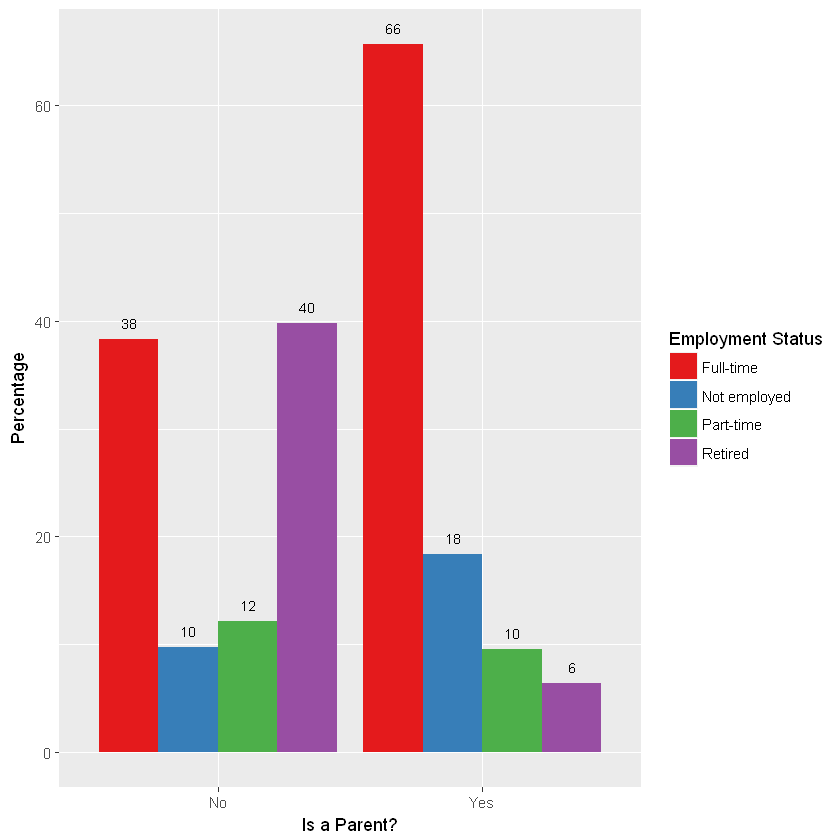

In [37]:
g3 <- ggplot(q3c1, aes((Parent), percent, fill = Employment)) + 
  geom_bar(stat="identity", position = "dodge") + 
 geom_text(aes(label=round(percent)), vjust=-1,position=position_dodge(.9), size=3) +
scale_fill_brewer(palette = "Set1")+
theme(plot.title = element_text(hjust = 0.5,face="bold"))+xlab("Is a Parent?")+ylab("Percentage")+guides(fill=guide_legend(title="Employment Status"))

g3


We can infer the following from the data above:
1. 66% of the respondents who are parents are employed in full-time jobs
2. Only 38% of the respondents who were NOT parents were employed in full-time jobs.

This validates our hypothesis that an individual who is a parent is more likely to have a full-time job, than someone who is not a parent

### Q.4 Political affiliation vs Race

Politics is often a dividing issue amongst people, and although race never compels an individual to vote for a certain party, but we can gather data to infer if people from a certain race are more likely to identify themselves as supporters of one party.

We gather the data where respondents have chosen to be either a Democrat, Republican or are Independent. The race groups we are studying are: White, Black/African-American, Asian or Pacific Islander, Mixed race and Native Americans.

In [38]:
q4 <- data %>% select(party,race) %>% filter(party==1|party==2|party==3)


In [39]:
q4 <- filter(q4, (race==1|race==2|race==3|race==4|race==5))


In [40]:
q4 <- na.omit(q4)

Labeling the data correctly, translating the values to their actual meaning and sorting it by party and race

In [41]:
q4$party[q4$party == "1"] <- "Republican"
q4$party[q4$party == "2"] <- "Democrat"
q4$party[q4$party == "3"] <- "Independent"
q4$race[q4$race == "1"] <- "White"
q4$race[q4$race == "2"] <- "Afr-American"
q4$race[q4$race == "3"] <- "Asian"
q4$race[q4$race == "4"] <- "Mixed"
q4$race[q4$race == "5"] <- "Native American"


In [42]:
q4 <- arrange(q4,party,race)


Counting values for each race, and combining with the total number of values

In [43]:
q4 <- count(q4,c('race','party'))


In [44]:
q4c <- count(q4,'race')


Using freq as weighting variable


In [45]:
q4j <- right_join(q4,q4c,by='race')


Renaming the columns appropriately, and adding a new column for percentage, and plotting the data

In [46]:
q4j <- rename.vars(q4j, c("race","party","freq.x","freq.y"), 
                          c("race","party","count","Total"))



Changing in q4j                              
From: race party freq.x freq.y
To:   race party count  Total 



In [47]:
q4j <- mutate(q4j, percent = count*100/Total)
q4j


race,party,count,Total,percent
Afr-American,Democrat,140,220,63.636364
Afr-American,Independent,63,220,28.636364
Afr-American,Republican,17,220,7.727273
Asian,Democrat,13,44,29.545455
Asian,Independent,20,44,45.454545
Asian,Republican,11,44,25.000000
Mixed,Democrat,15,39,38.461538
Mixed,Independent,20,39,51.282051
Mixed,Republican,4,39,10.256410
Native American,Democrat,6,15,40.000000


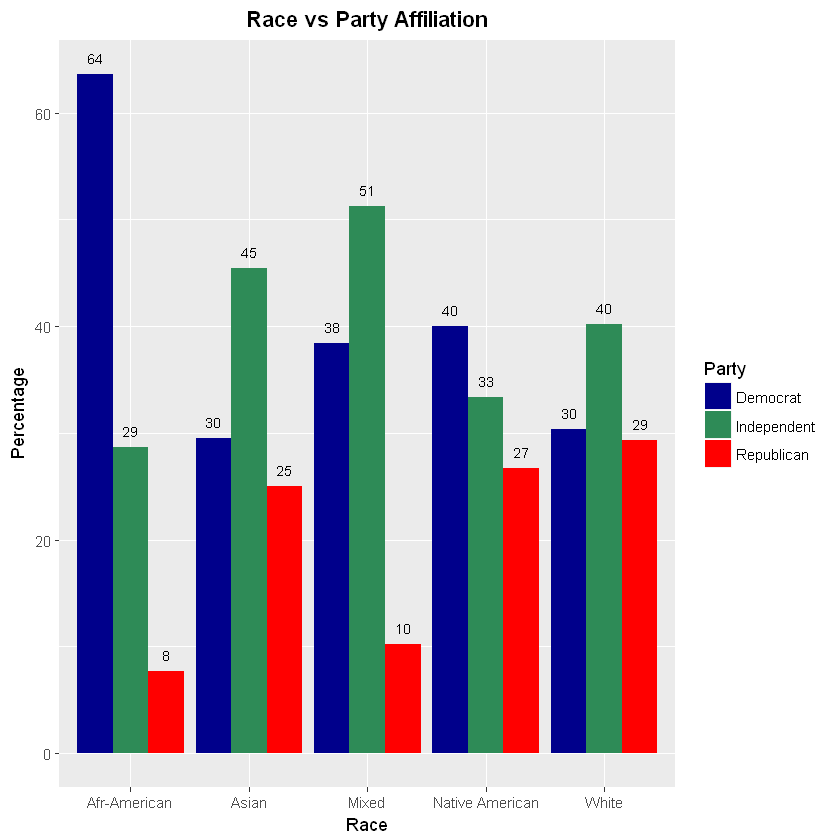

In [48]:
g4 <- ggplot(q4j, aes((race), percent, fill = party),ylab="Percentage",xlab="Race") + 
  geom_bar(stat="identity", position = "dodge") + 
 geom_text(aes(label=round(percent)), vjust=-1,position=position_dodge(.9), size=3)+ 
scale_fill_manual(values = c("darkblue","seagreen4","red")) + ggtitle("Race vs Party Affiliation") +
  theme(plot.title = element_text(hjust = 0.5,face="bold"))+xlab("Race")+ylab("Percentage")+guides(fill=guide_legend(title="Party"))

g4

We infer the following from the above data:
1. 64% African-Americans identify themselves as Democrat supporters, whereas only 8% within this group
   identifies as Republican supporters
2. 30% Asians are Democrat supporters, whereas 25% are Republican supporters
3. Amongst mixed race respondents, 38% are Democrat supporters, whereas only 10% are Republican supporters
4. Native Americans have 40% people as Democrat supporters and 27% support Republicans
5. White people more or less equally support both Democrats(30%) and Republicans(29%)

<br><br><br>

### Q.5 Education vs Manual/Physical Labor Jobs

Is there a relation between the level of education of an individual and whether or not his job involves manual/physical labor? By intuition, I believe that a higher level of education is associated with lesser number of manual/physical labor jobs, and a lower level of education would indicate a higher presence in manual labor jobs.

We gather data about the educational qualifications and whether their current employment involves manual/physical labor or not.

In [49]:
q5 <- data %>% select(educ2,emptype2) %>% filter((emptype2==1|emptype2==2) & ((educ2!=98) & (educ2!=99)))


Translate the values to appropriate labels and omit NA values

In [50]:
q5$educ2[q5$educ2 == "1"|q5$educ2 == "2"] <- "LT High School"
q5$educ2[q5$educ2 == "3"] <- "High School Grad"
q5$educ2[q5$educ2 == "4"|q5$educ2 == "5"] <- "Some Colg/2 Year Degree"
q5$educ2[q5$educ2 == "6"|q5$educ2 == "7"|q5$educ2 == "8"] <- "Colg Grad + "
q5$emptype2[q5$emptype2 == "1"] <- "Yes"
q5$emptype2[q5$emptype2 == "2"] <- "No"



In [51]:
q5 <- na.omit(q5)


Sort the data accordingly, get a count of the individual groups and add a total column

In [52]:
q5 <- arrange(q5,educ2,emptype2)


In [53]:
q5<- count(q5,c('educ2','emptype2'))


In [54]:
q5c <- count(q5,'emptype2')


Using freq as weighting variable


In [55]:
q5c2 <- right_join(q5,q5c, by='emptype2')


Rename the columns, add a column for percentage and plot the data

In [56]:
q5c2 <- rename.vars(q5c2, c("educ2","emptype2","freq.x","freq.y"), 
                          c("Education","ManualLabor","Count","Total"))


Changing in q5c2                                         
From: educ2     emptype2    freq.x freq.y
To:   Education ManualLabor Count  Total 



In [57]:
q5c2 <- mutate(q5c2,percent=Count*100/Total)
q5c2

Education,ManualLabor,Count,Total,percent
Colg Grad +,No,450,651,69.124424
High School Grad,No,56,651,8.602151
LT High School,No,8,651,1.228879
Some Colg/2 Year Degree,No,137,651,21.044547
Colg Grad +,Yes,86,442,19.457014
High School Grad,Yes,163,442,36.877828
LT High School,Yes,43,442,9.728507
Some Colg/2 Year Degree,Yes,150,442,33.936652


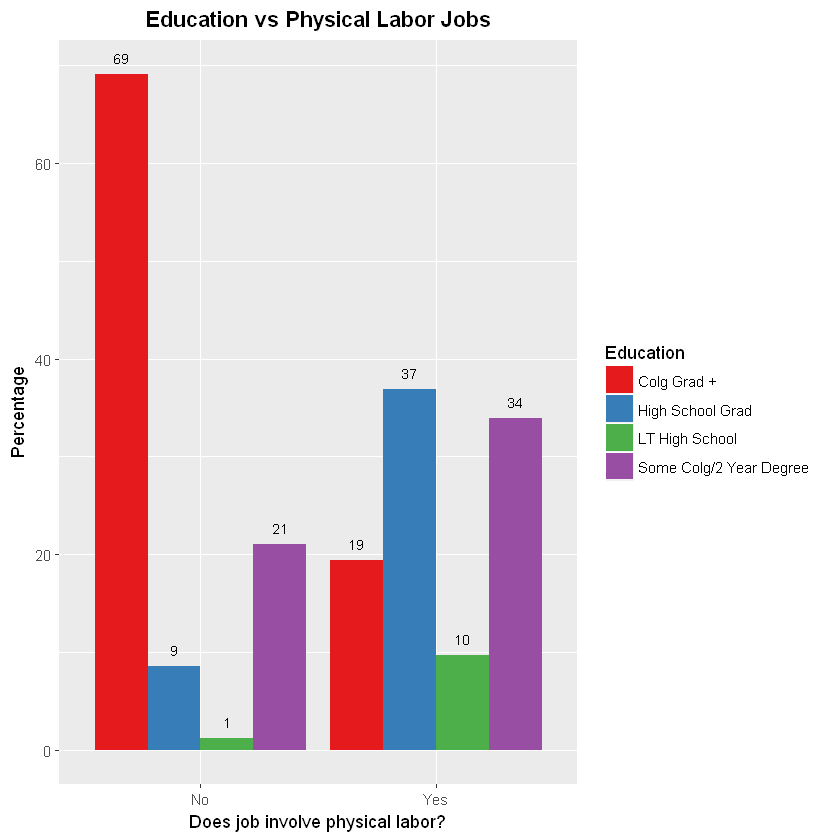

In [58]:
g5 <- ggplot(q5c2, aes((ManualLabor), percent, fill = Education),ylab="Percentage",xlab="Does job entail physical labor?") + 
  geom_bar(stat="identity", position = "dodge") + 
 geom_text(aes(label=round(percent)), vjust=-1,position=position_dodge(.9), size=3)+ 
scale_fill_brewer(palette="Set1") + ggtitle("Education vs Physical Labor Jobs") +
  theme(plot.title = element_text(hjust = 0.5,face="bold"))+xlab("Does job involve physical labor?")+ylab("Percentage")+guides(fill=guide_legend(title="Education"))
g5

We infer the following from the plot above:
1. Out of individuals whose job does NOT contain physical labor, 69% are at least college graduates (and above)
2. Individuals whose job does involve physical labor, only 19% are college graduates and above
3. In physical labor jobs, 47% individuals have education level of high school graduate or lesser

Thus, this proves the intuition that an individual with higher level of education is less likely to be employed in a physically laborious job than someone with relatively lesser education.

### Q.6 Income vs Physical Labor Employment

This question deals with the relation between a physical labor job and income. Generally, such jobs don't result in a very high pay. We try to infer this from the data we have.

We first take the income data and employment(physical labor or not) data for the respondents, and translate the values to appropriate labels, and then removing the invalid values.

In [59]:
q6 <- data %>% select(inc,emptype2) %>% filter((emptype2==1|emptype2==2) & ((inc!=98) & (inc!=99)))


In [60]:
q6$inc[q6$inc == "1"|q6$inc == "2"|q6$inc=="3"] <- "<30K"
q6$inc[q6$inc == "4"|q6$inc=="5"] <- "30-50K"
q6$inc[q6$inc == "6"] <- "50-75K"
q6$inc[q6$inc == "7"|q6$inc == "8"|q6$inc == "9"] <- "Over 75K "
q6$emptype2[q6$emptype2 == "1"] <- "Yes"
q6$emptype2[q6$emptype2 == "2"] <- "No"



In [61]:
q6 <- na.omit(q6)


We sort the data by income and employment type, count the number of entries for each group, and add a column for the total number of values per group

In [62]:
q6 <- arrange(q6,inc,emptype2)


In [63]:
q6<- count(q6,c('inc','emptype2'))


In [64]:
q6c <- count(q6,'emptype2')


Using freq as weighting variable


In [65]:
q6c2 <- right_join(q6,q6c, by='emptype2')


We rename the columns appropriately and add a column for percentage, and then plot the graph

In [66]:
q6c2 <- rename.vars(q6c2, c("inc","emptype2","freq.x","freq.y"), 
                          c("Income","ManualLabor","Count","Total"))


Changing in q6c2                                      
From: inc    emptype2    freq.x freq.y
To:   Income ManualLabor Count  Total 



In [67]:
q6c2 <- mutate(q6c2,percent=Count*100/Total)
q6c2

Income,ManualLabor,Count,Total,percent
<30K,No,72,580,12.41379
30-50K,No,91,580,15.68966
50-75K,No,106,580,18.27586
Over 75K,No,311,580,53.62069
<30K,Yes,139,406,34.23645
30-50K,Yes,102,406,25.12315
50-75K,Yes,68,406,16.74877
Over 75K,Yes,97,406,23.89163


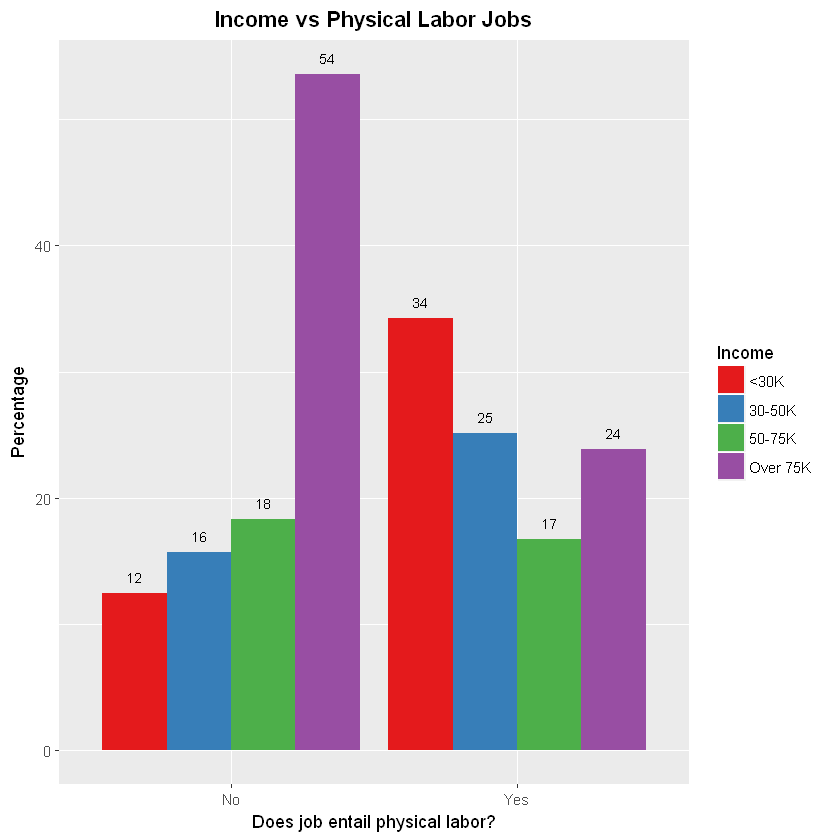

In [68]:
g6 <- ggplot(q6c2, aes((ManualLabor), percent, fill = Income),ylab="Percentage",xlab="Does job entail physical labor?") + 
  geom_bar(stat="identity", position = "dodge") + 
 geom_text(aes(label=round(percent)), vjust=-1,position=position_dodge(.9), size=3)+ 
scale_fill_brewer(palette="Set1") + ggtitle("Income vs Physical Labor Jobs") +
  theme(plot.title = element_text(hjust = 0.5,face="bold"))+xlab("Does job entail physical labor?")+ylab("Percentage")+guides(fill=guide_legend(title="Income"))
g6

We infer the following from the above data:
1. 59% of the respondents employed in Physical labor jobs have an annual income of less than 50000 USD, and only 24% have an income of 75000 and above.

2. Out of the people having non-physical labor jobs, 54% respondents have an annual income of 75000 and above.

These results confirm the hypothesis that physical labor jobs are more likely to be associated with a lesser annual income than a job which does not involve physical labor.
